# In-Depth: Decision Trees and Random Forests


# IMPORTS



In [ ]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import metrics
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Categorize Data

Shape of data:  (2658, 41)
Shape of labels:  (2658,)
0
507


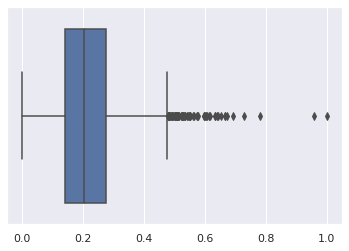

In [ ]:


all_data = np.load('normalized_clean_data.npy')
data = all_data[:,:all_data.shape[1]-1]
print("Shape of data: ", data.shape)
oldlabels = all_data[:,-1]
labels = np.zeros(oldlabels.shape)
print("Shape of labels: ", labels.shape)
count = 0
tcount = 0
fcount = 0
for x in oldlabels:
  if x >= 0 and x < .3:
    labels[count] = 0
  else:
    labels[count] = 1
    fcount = fcount + 1
  count = count + 1

all_titles = np.genfromtxt('clean_data_only_title.csv', delimiter=',', dtype='str')
titles = all_titles[:all_titles.shape[0]-1]
print(tcount)
print(fcount)
sns.boxplot(x=oldlabels)


# Visualizing One Decision Tree

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


KeyboardInterrupt: ignored

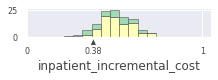

In [ ]:

tree = tree.DecisionTreeClassifier().fit(data, labels)

viz = dtreeviz(tree, data, labels,
                target_name="target",
                feature_names=titles, 
                class_names =["0", "1", "2", "3"])
viz
viz.save("decision_tree.svg")

# Bagging the Data

In [ ]:


tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(data, labels)


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


# Fitting Random Forest with Default Values

In [ ]:


model = RandomForestClassifier(n_estimators=100, random_state=0)


In [ ]:


Xtrain, Xtest, ytrain, ytest = train_test_split(data, labels,
                                                random_state=0)

model = RandomForestClassifier(n_estimators=10)
model.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Random Forest Evaluation

Shape of training data:  (1993, 41)
Shape of test data:  (665, 41)
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89       605
         1.0       0.26      0.57      0.36        60

    accuracy                           0.82       665
   macro avg       0.61      0.70      0.63       665
weighted avg       0.89      0.82      0.84       665



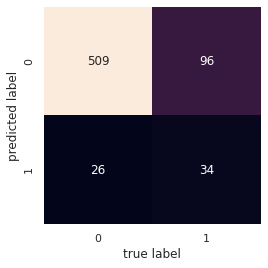

In [ ]:
ypred = model.predict(Xtest)
print("Shape of training data: ", Xtrain.shape)
print("Shape of test data: ", Xtest.shape)
print(metrics.classification_report(ypred, ytest))

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Visualizing Feature Importance

In [ ]:
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(titles, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable: prev_hd              Importance: 0.07
Variable: Cardiac Rehabilitation Eligibility Importance: 0.06
Variable: home_val             Importance: 0.05
Variable: income               Importance: 0.05
Variable: no_college           Importance: 0.04
Variable: Renin-Angiotensin System only Importance: 0.03
Variable: pharm_count          Importance: 0.03
Variable: medicaid             Importance: 0.03
Variable: LesiureTimePhysicalActivity Importance: 0.03
Variable: perc_65up            Importance: 0.03
Variable: no_hishschool        Importance: 0.03
Variable: foodstmp             Importance: 0.03
Variable: outpatient_incremental_cost Importance: 0.03
Variable: cholestrol_all       Importance: 0.02
Variable: Diuretic only        Importance: 0.02
Variable: hospitals_count      Importance: 0.02
Variable: Health_insurance     Importance: 0.02
Variable: Diabetes percentage  Importance: 0.02
Variable: Obesity percentage   Importance: 0.02
Variable: perc_aian            Importance: 0.02
Var

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Evaluation

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    #mape = 100 * np.mean(errors / test_labels)
    #accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))

# RandomizedSearchCV

In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:



rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)



In [ ]:

rf_random.fit(Xtrain, ytrain)
rf_random.best_params_

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, Xtest, ytest)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.9min finished


Model Performance
Average Error: 0.1774 degrees.


# RandomizedSearch Evaluation

In [ ]:
print("RANDOMIZED EVALUATION")
ypred = best_random.predict(Xtest)

print(metrics.classification_report(ypred, ytest))

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

RANDOMIZED EVALUATION


NameError: ignored

# GridSearchCV

In [ ]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(Xtrain, ytrain)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 12.0min finished


{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 1000}


# GridSearch Evaluation

GRID EVALUATION
Model Performance
Average Error: 0.1789 degrees.
              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90       632
         1.0       0.17      0.67      0.27        33

    accuracy                           0.82       665
   macro avg       0.57      0.75      0.58       665
weighted avg       0.94      0.82      0.87       665



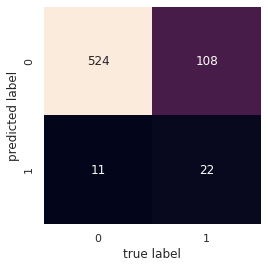

In [ ]:
print("GRID EVALUATION")
grid_accuracy = evaluate(best_grid, Xtest, ytest)
ypred = best_grid.predict(Xtest)
print(metrics.classification_report(ypred, ytest))
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');